In [81]:
import pandas as pd
from autogluon.tabular import TabularPredictor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [82]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')

## DATA ANALYSIS

In [83]:
train_df.drop(['Id'], axis=1, inplace=True)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### Missing values
The missing values will be treated like:
- if there is more than 50% missing values in a column, drop that.
- if there is less than 50% missing values, it will be substituted by the median (for numerical columns) or the mode (for categorical columns)

In [85]:
numerical_columns = train_df.select_dtypes(include=[np.number]).columns.tolist()
train_df = train_df[numerical_columns]
numerical_columns.remove('SalePrice')
test_df = test_df[numerical_columns]

In [86]:
train_df.fillna(np.median, inplace=True)
train_df.isnull().sum()

/var/folders/77/x5bdxswj42g15hjcw4d35qk40000gn/T/ipykernel_51375/2955509232.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '<function median at 0x10bb0e200>' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_df.fillna(np.median, inplace=True)


MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

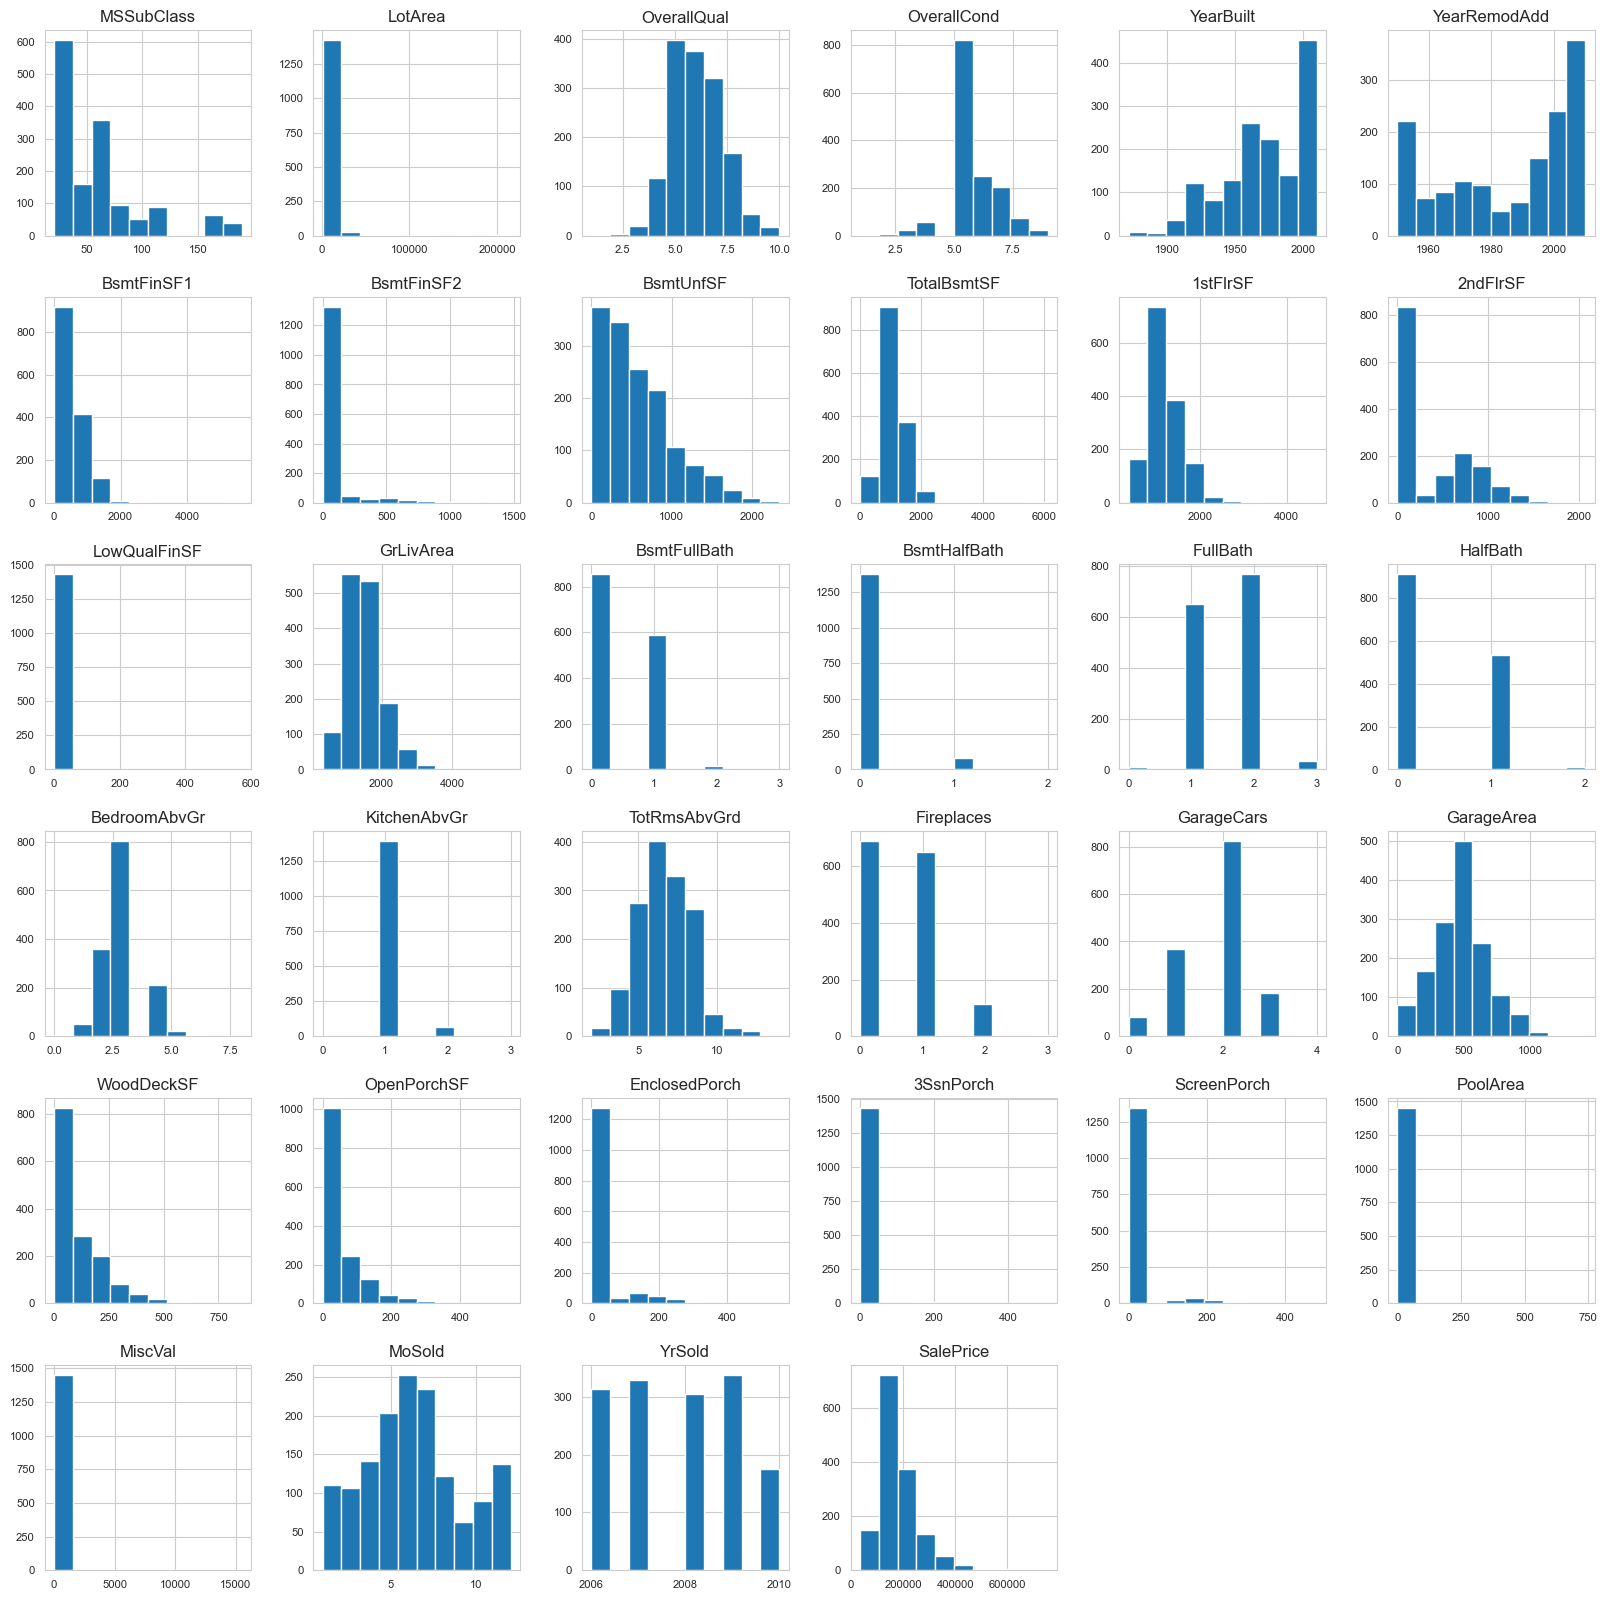

In [87]:
train_df.hist(figsize=(20, 20), xlabelsize=8, ylabelsize=8)
sns.set_style('whitegrid')
plt.show()

/var/folders/77/x5bdxswj42g15hjcw4d35qk40000gn/T/ipykernel_51375/3980555535.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'])


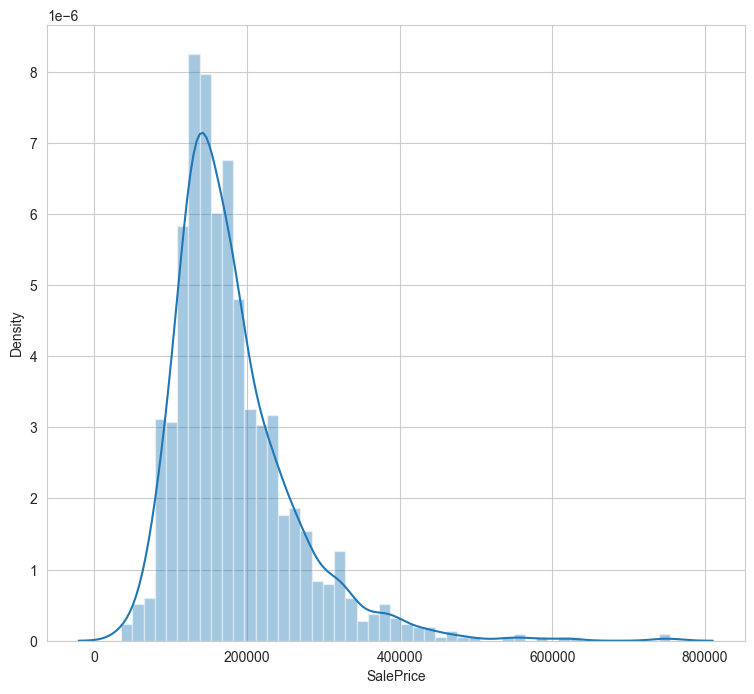

In [88]:
plt.figure(figsize=(9, 8))
sns.distplot(train_df['SalePrice'])
plt.show()

# AUTOGLUON

In [89]:
label = 'SalePrice'
predictor = TabularPredictor(label=label, path='model/').fit(train_df)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.14
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.5.0: Wed May  1 20:16:51 PDT 2024; root:xnu-10063.121.3~5/RELEASE_ARM64_T8103
CPU Count:          8
Memory Avail:       1.41 GB / 8.00 GB (17.6%)
Disk Space Avail:   41.79 GB / 228.27 GB (18.3%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for ini

[1000]	valid_set's rmse: 30584.2
[2000]	valid_set's rmse: 30069.8
[3000]	valid_set's rmse: 29941.1
[4000]	valid_set's rmse: 29944.7


	-29938.2309	 = Validation score   (-root_mean_squared_error)
	5.69s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: LightGBM ...


[1000]	valid_set's rmse: 29357.6
[2000]	valid_set's rmse: 28976.9
[3000]	valid_set's rmse: 28882.7
[4000]	valid_set's rmse: 28849.2
[5000]	valid_set's rmse: 28835.1
[6000]	valid_set's rmse: 28831.3
[7000]	valid_set's rmse: 28829.7
[8000]	valid_set's rmse: 28829.1
[9000]	valid_set's rmse: 28829.1
[10000]	valid_set's rmse: 28829


	-28829.0422	 = Validation score   (-root_mean_squared_error)
	16.06s	 = Training   runtime
	0.13s	 = Validation runtime
Fitting model: RandomForestMSE ...
	-32987.4025	 = Validation score   (-root_mean_squared_error)
	0.85s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: CatBoost ...
	-30677.7319	 = Validation score   (-root_mean_squared_error)
	50.74s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: ExtraTreesMSE ...
	-31358.4162	 = Validation score   (-root_mean_squared_error)
	0.32s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: NeuralNetFastAI ...
	-37287.1308	 = Validation score   (-root_mean_squared_error)
	0.96s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: XGBoost ...
	-28092.7479	 = Validation score   (-root_mean_squared_error)
	1.41s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: NeuralNetTorch ...
	-38193.7477	 = Validation score   (-root_mean_squared_error)
	1.47s	 = Training   runti

[1000]	valid_set's rmse: 36174.8


	-36160.9404	 = Validation score   (-root_mean_squared_error)
	5.41s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ...
	Ensemble Weights: {'XGBoost': 0.467, 'LightGBM': 0.333, 'LightGBMXT': 0.2}
	-27092.7746	 = Validation score   (-root_mean_squared_error)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 85.28s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 1806.1 rows/s (292 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("model/")


In [90]:
actual = pd.read_csv('dataset/sample_submission.csv')
predicted = predictor.predict(test_df)
predictor.evaluate_predictions(y_true=actual[label], y_pred=predicted)

{'root_mean_squared_error': -72967.21540887037,
 'mean_squared_error': -5324214524.524488,
 'mean_absolute_error': -54664.30257597815,
 'r2': -18.526412273638304,
 'pearsonr': 0.3018234895471449,
 'median_absolute_error': -44482.091714951006}

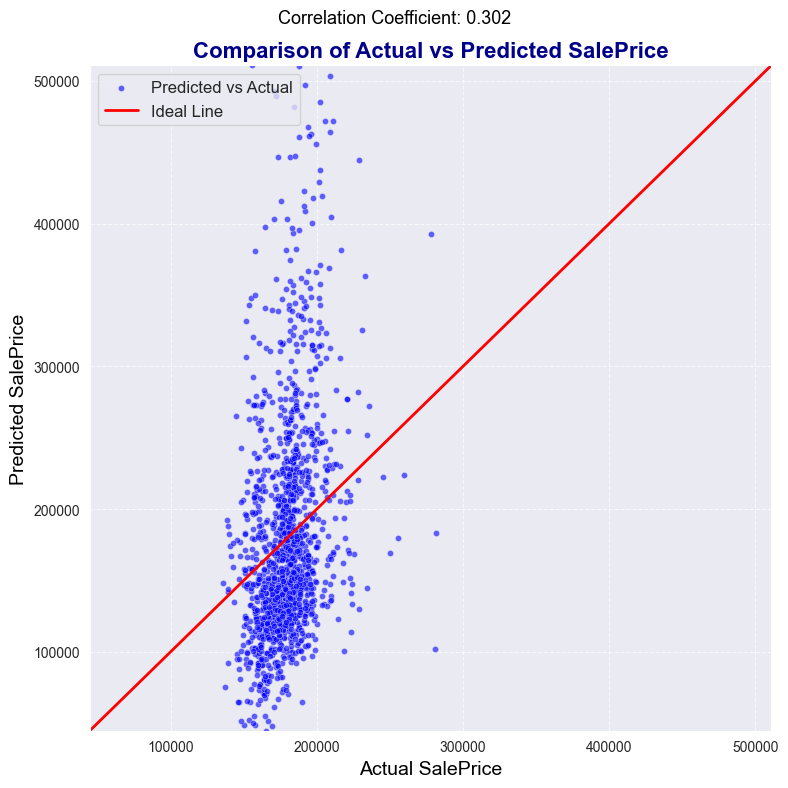

In [91]:
correlation = np.corrcoef(actual[label], predicted)[0, 1]

sns.set_style("darkgrid")

plt.figure(figsize=(8, 8))

sns.scatterplot(x=actual[label], y=predicted, color='blue', alpha=0.6, s=20, label='Predicted vs Actual')

max_value = max(actual[label].max(), predicted.max())
min_value = min(actual[label].min(), predicted.min())

sns.lineplot(x=[min_value, max_value], y=[min_value, max_value], color='red', linewidth=2, label='Ideal Line')

plt.title('Comparison of Actual vs Predicted SalePrice', fontsize=16, fontweight='bold', color='darkblue')
subtitle = 'Correlation Coefficient: {:.3f}'.format(correlation)
plt.suptitle(subtitle, fontsize=13, color='black')
plt.xlabel('Actual SalePrice', fontsize=14, color='black')
plt.ylabel('Predicted SalePrice', fontsize=14, color='black')

plt.xlim(min_value, max_value)
plt.ylim(min_value, max_value)

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()